# Timelapse Nanog

In [1]:
%pip uninstall basicpy -yq
%pip install basicpy matplotlib

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.236266128529678e-07.
INFO:basicpy.basicpy:mean of S: 1.0000019073486328.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 9.331299679615768e-07.
INFO:basicpy.basicpy:mean of S: 0.9999997615814209.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.0033754121977835894
INFO:basicpy.basicpy:elapsed time: 6.072002906003036 seconds
INFO:basicpy.basicpy:Reweighting converged.
INFO:basicpy.basicpy:=== BaSiC fit finished in 6.159432512009516 seconds ===


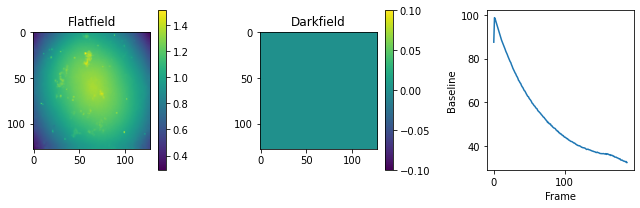

In [2]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images = bdata.timelapse_nanog()
basic = BaSiC(lambda_flatfield_coef=0.001)
basic.fit(images)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()


INFO:basicpy.basicpy:Initializing BaSiC 5291199680 with parameters: 
lambda_flatfield_coef: 0.35

INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.531110099989746e-07.
INFO:basicpy.basicpy:mean of S: 0.9999983906745911.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 8.74313570875529e-07.
INFO:basicpy.basicpy:mean of S: 0.9999995827674866.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.0034125312231481075
INFO:basicpy.basicpy:elapsed time: 4.979901256971061 seconds
INFO:basicpy.basicpy:Reweighting converged.
INFO:basicpy.basicpy:=== BaSiC fit finished in 4.988132485945243 seconds ===


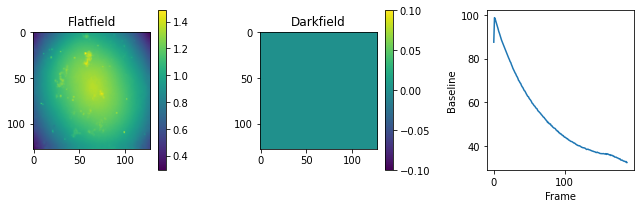

In [3]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images = bdata.timelapse_nanog()
basic = BaSiC(lambda_flatfield_coef=0.35)
basic.fit(images)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()


In [4]:
images_transformed = basic.transform(images)


INFO:basicpy.basicpy:=== BaSiC transform started ===
INFO:basicpy.basicpy:unshading in 8 threads
INFO:basicpy.basicpy:=== BaSiC transform finished in 0.0341583649860695 seconds ===


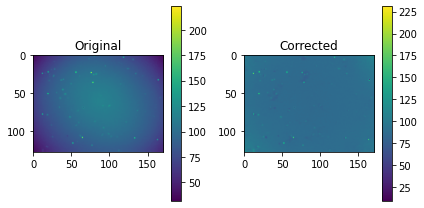

In [5]:
i = 12
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
im = axes[0].imshow(images[i])
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i])
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()
